# Interpolación globos 3D a partir de polares. Con Neural Network a partir de funciones de transferencia de SPL y fase. Tratando el problema como un problema de imagen con una U-net como en "Modeling individual head-related transfer functions from sparse measurements using a convolutional neural network"


In [13]:
%reset -f

In [31]:
# importamos las librerías que vamos a utilizar. Algunas contienen funciones desarrolladas para este proyecto
import numpy as np
import pandas as pd
import scipy as scp
import matplotlib
import matplotlib.pyplot as plt



from sklearn.model_selection import GridSearchCV, train_test_split

from timeit import default_timer as timer

import sys
sys.path.append('C:/Users/vcatala/OneDrive/PhD UV/Artículos/interpolation')

import Funciones_big_data_v31
from importlib import reload
reload(Funciones_big_data_v31)

from Funciones_big_data_v31 import import_3D
from Funciones_big_data_v31 import n_smoothing
from Funciones_big_data_v31 import plot_balloon
from Funciones_big_data_v31 import plot_polars, calcular_frecuencias_iso_octava, seleccionar_columnas_frecuencias_iso, create_spl_image, save_image
from Funciones_big_data_v31 import plot_polar_plane, frequency_vector, FR_pd_v2, normalize, create_spl_heatmap, data_frame_solo_polares, seleccionar_frecuencias_proximas_a_iso
from polar_non_polar_split_cart_v20 import polar_split, polar_reconstruction

# establecemos el tamoño de los gráficos de los gráficos de Matplotlib. El tamaño por defecto es muy pequeño
plt.rcParams['figure.figsize'] = [20, 10]




In [15]:
# Introducimos la resolución angular con la que se han realizado las mediciones. Es un dato que conocemos de las medidas
resol=5


In [16]:
### vamos a generar el proceso para importar un balloon y generar una imagen. Luego lo meteremos en un bucle que importe y genere imagen para todos los sistemas en un directorio

In [17]:
path = 'C:\\Users\\vcatala\\OneDrive\\PhD UV\\Artículos\\3D clio\\ARTEC 306'
[IR,Fs]=(import_3D(path, resol))

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 5000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 5500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306/IR 0 6000.txt
C:\Users\vcatala\OneDrive\PhD

In [18]:
# [freq, i_nyquist]= frequency_vector(IR, Fs)

In [19]:

# freq 2 contiene las frecuencias que utilizan en el artículo "Modeling individual head-related transfer functions from sparse measurements using a convolutional neural network"
freq2 = np.fft.rfftfreq(256, d=1/44100)

In [20]:
freq2

array([    0.      ,   172.265625,   344.53125 ,   516.796875,
         689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
        1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
        2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
        2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
        3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
        4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
        4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
        5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
        6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
        6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
        7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
        8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
        8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
        9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
       10335.9375  , 10508.203125, 10680.46875 , 10852.

In [21]:
# vemos ahora qué tamaño de fft vamos a coger para tener resolución en las respuestas en frecuencia
freq = np.fft.rfftfreq(4096, d=1/48000)

In [22]:
fft_size=4096
fs=48000

In [23]:
FR= FR_pd_v2(IR,fft_size, fs)

In [24]:
FR= normalize(FR)

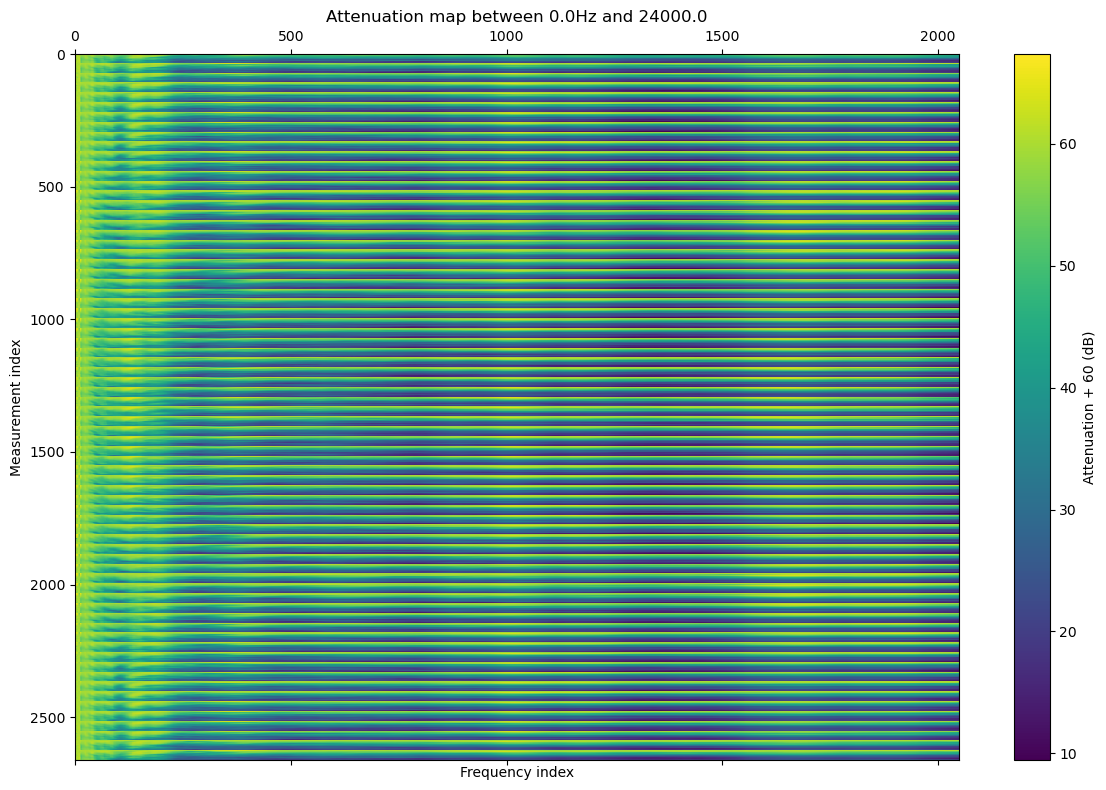

In [25]:
create_spl_heatmap(FR)

In [32]:
FR_polares= data_frame_solo_polares(FR)

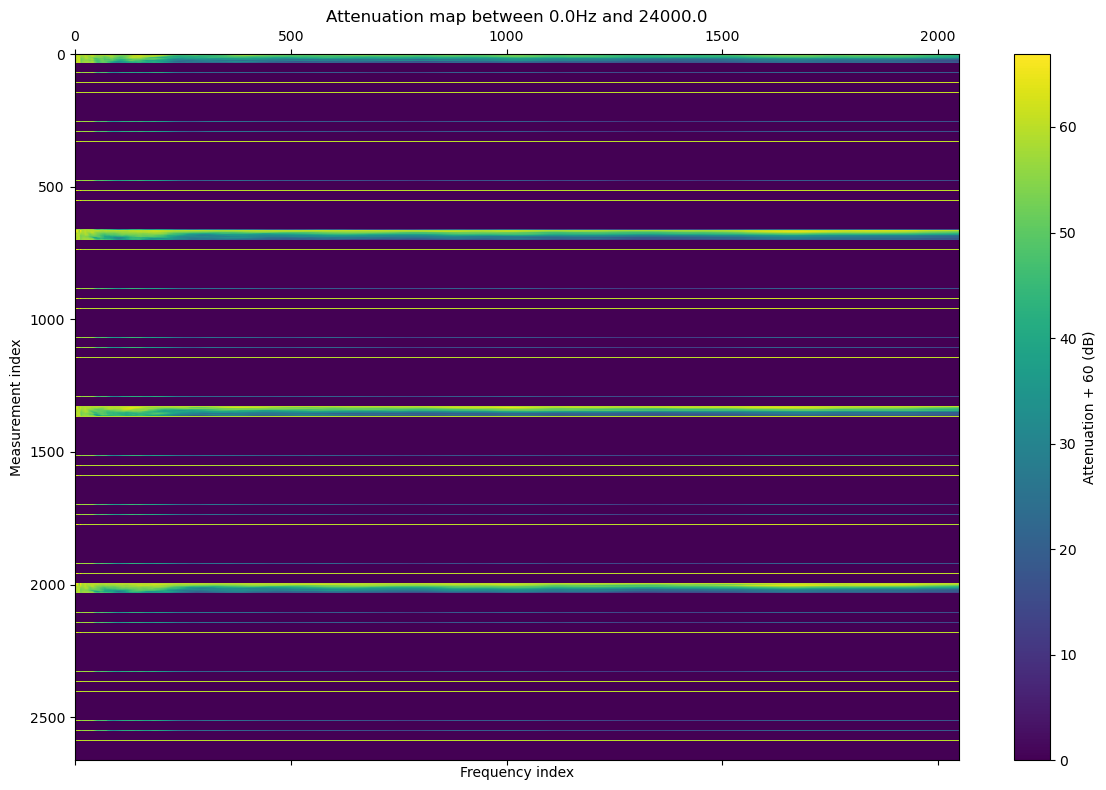

In [33]:
create_spl_heatmap(FR_polares)

In [34]:
calcular_frecuencias_iso_octava(100, 20000,3)

[100.0,
 125.99210498948732,
 158.74010519681994,
 200.0,
 251.98420997897463,
 317.4802103936399,
 400.0,
 503.96841995794927,
 634.9604207872798,
 800.0,
 1007.9368399158985,
 1269.9208415745595,
 1600.0,
 2015.873679831797,
 2539.841683149119,
 3200.0,
 4031.747359663594,
 5079.683366298238,
 6400.0,
 8063.494719327188,
 10159.366732596476,
 12800.0,
 16126.989438654376]

In [35]:
n=1

frecuencias_seleccionadas = seleccionar_frecuencias_proximas_a_iso(freq, n, 100, 20000)

# Imprimir las frecuencias seleccionadas
print(frecuencias_seleccionadas)

[105.46875, 199.21875, 398.4375, 796.875, 1605.46875, 3199.21875, 6398.4375, 12796.875]


In [36]:
n = 6  # 1/24 de octava

frecuencias_seleccionadas = seleccionar_frecuencias_proximas_a_iso(freq, n, 100, 20000)

# Imprimir las frecuencias seleccionadas
print(frecuencias_seleccionadas)

[105.46875, 117.1875, 128.90625, 140.625, 164.0625, 175.78125, 199.21875, 222.65625, 257.8125, 281.25, 316.40625, 351.5625, 398.4375, 445.3125, 503.90625, 562.5, 632.8125, 714.84375, 796.875, 902.34375, 1007.8125, 1136.71875, 1265.625, 1429.6875, 1605.46875, 1792.96875, 2015.625, 2261.71875, 2542.96875, 2847.65625, 3199.21875, 3597.65625, 4031.25, 4523.4375, 5074.21875, 5707.03125, 6398.4375, 7183.59375, 8062.5, 9046.875, 10160.15625, 11402.34375, 12796.875, 14367.1875, 16125.0, 18105.46875]


In [37]:
# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'df' y quieres seleccionar las frecuencias ISO 1/24 de octava
# en el rango de 20 a 20000 Hz.
n = 6
fmin = 100
fmax = 20000

df_resultante = seleccionar_columnas_frecuencias_iso(FR, n, 100, 20000)

In [38]:
df_resultante.columns

Index(['Phi', 'Theta', 'x', 'y', 'z', '105.46875', '117.1875', '128.90625',
       '140.625', '164.0625', '175.78125', '199.21875', '222.65625',
       '257.8125', '281.25', '316.40625', '351.5625', '398.4375', '445.3125',
       '503.90625', '562.5', '632.8125', '714.84375', '796.875', '902.34375',
       '1007.8125', '1136.71875', '1265.625', '1429.6875', '1605.46875',
       '1792.96875', '2015.625', '2261.71875', '2542.96875', '2847.65625',
       '3199.21875', '3597.65625', '4031.25', '4523.4375', '5074.21875',
       '5707.03125', '6398.4375', '7183.59375', '8062.5', '9046.875',
       '10160.15625', '11402.34375', '12796.875', '14367.1875', '16125.0',
       '18105.46875'],
      dtype='object')

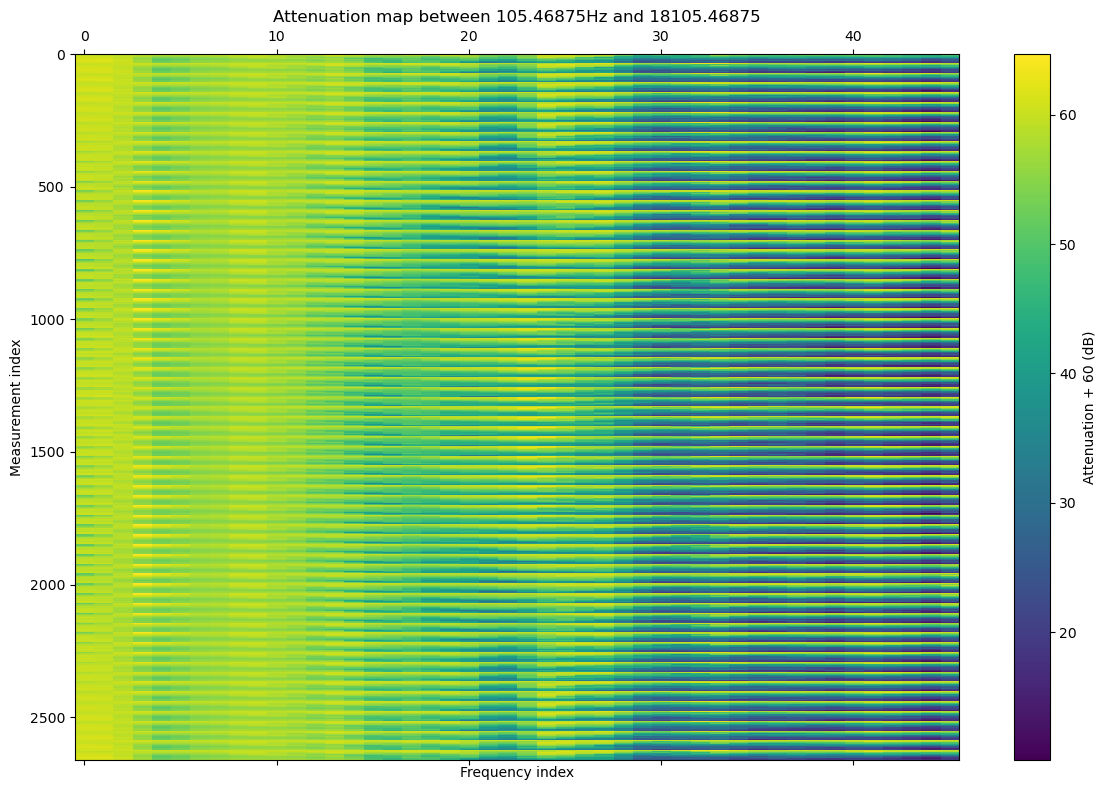

In [39]:
create_spl_heatmap(df_resultante)

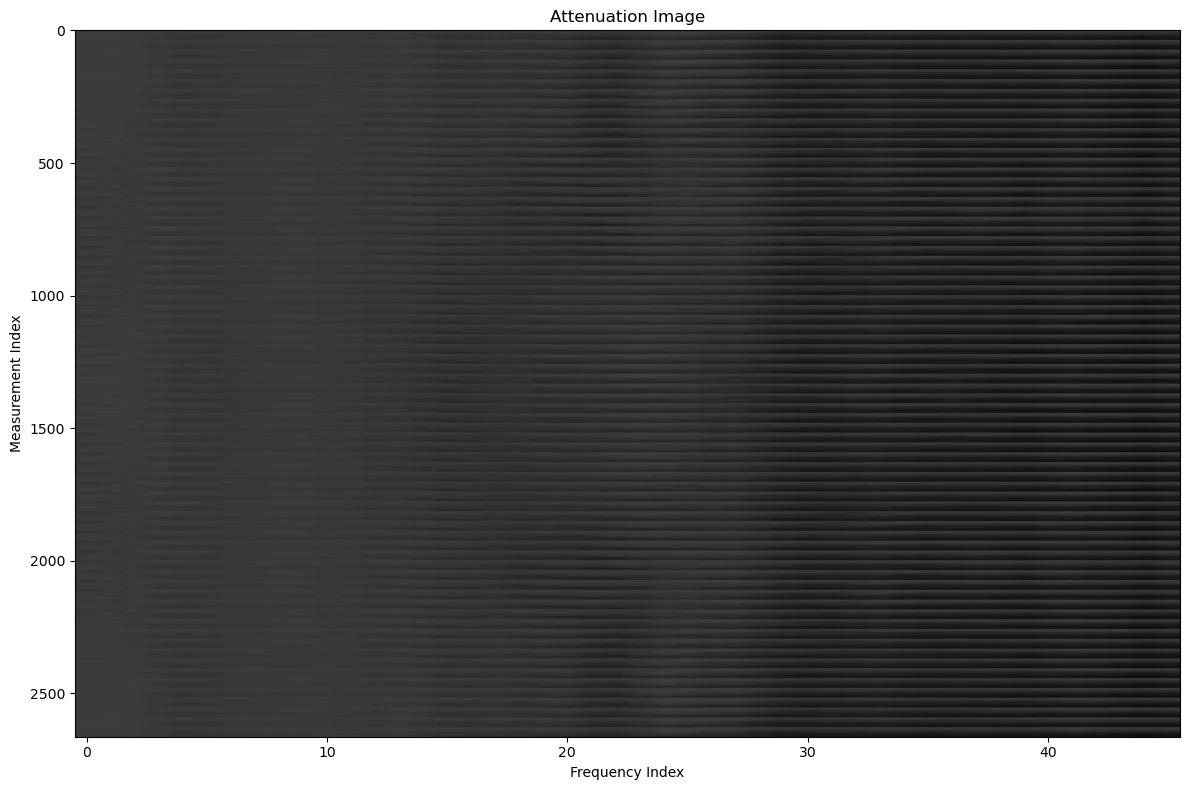

In [40]:
image = create_spl_image(df_resultante)

### Recolección de datos
Importamos las mediciones de radiación del altavoz.
Se utiliza una función contenida en "Funciones_big_data_v31.py"
Le pasamos el path y la resolución angular de las medidas.

In [41]:
import glob
 


C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 306\/IR 0 5000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3

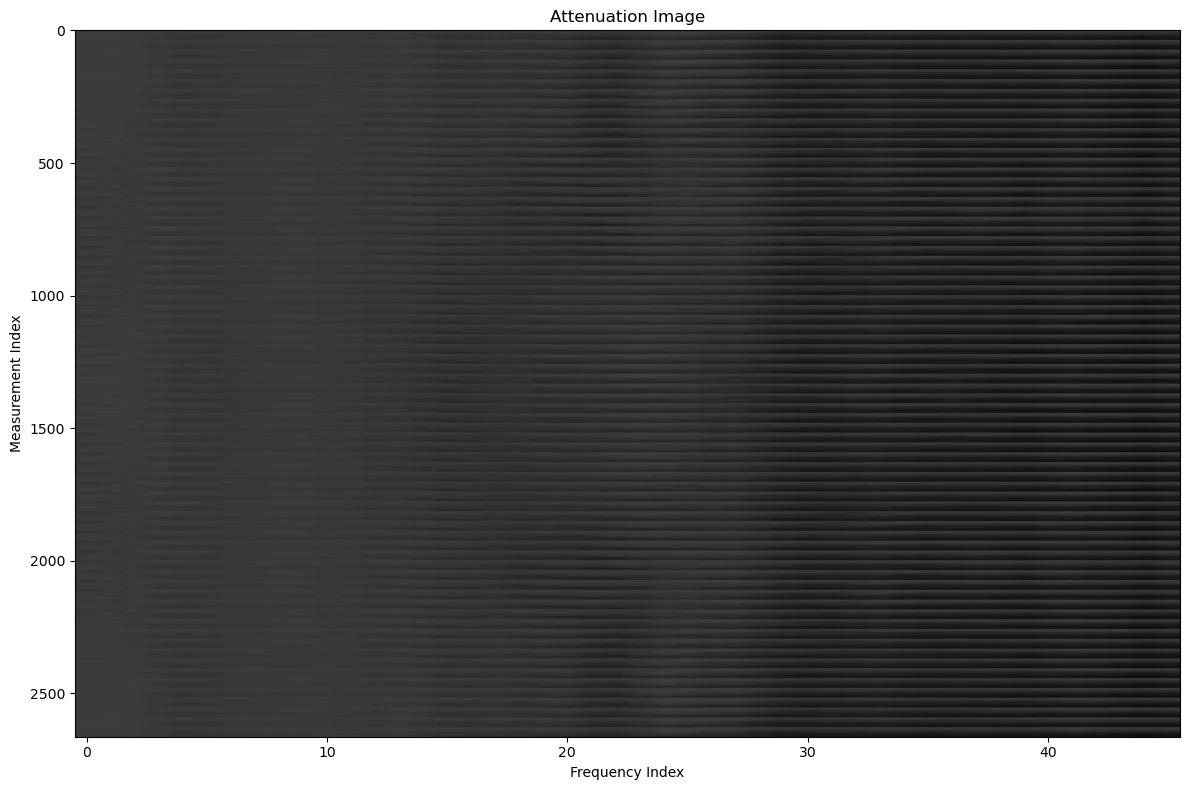

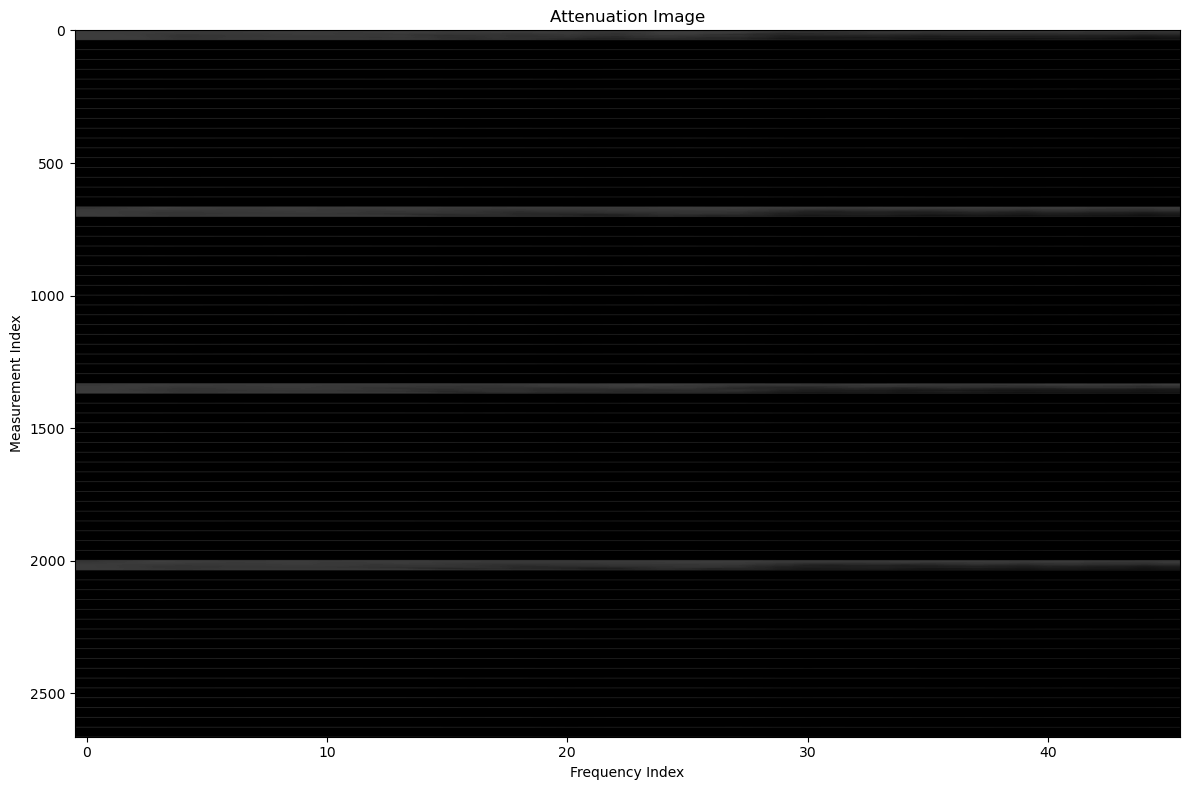

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\ARTEC 31064\/IR 0 5000.txt
C:\Users\vcatala\O

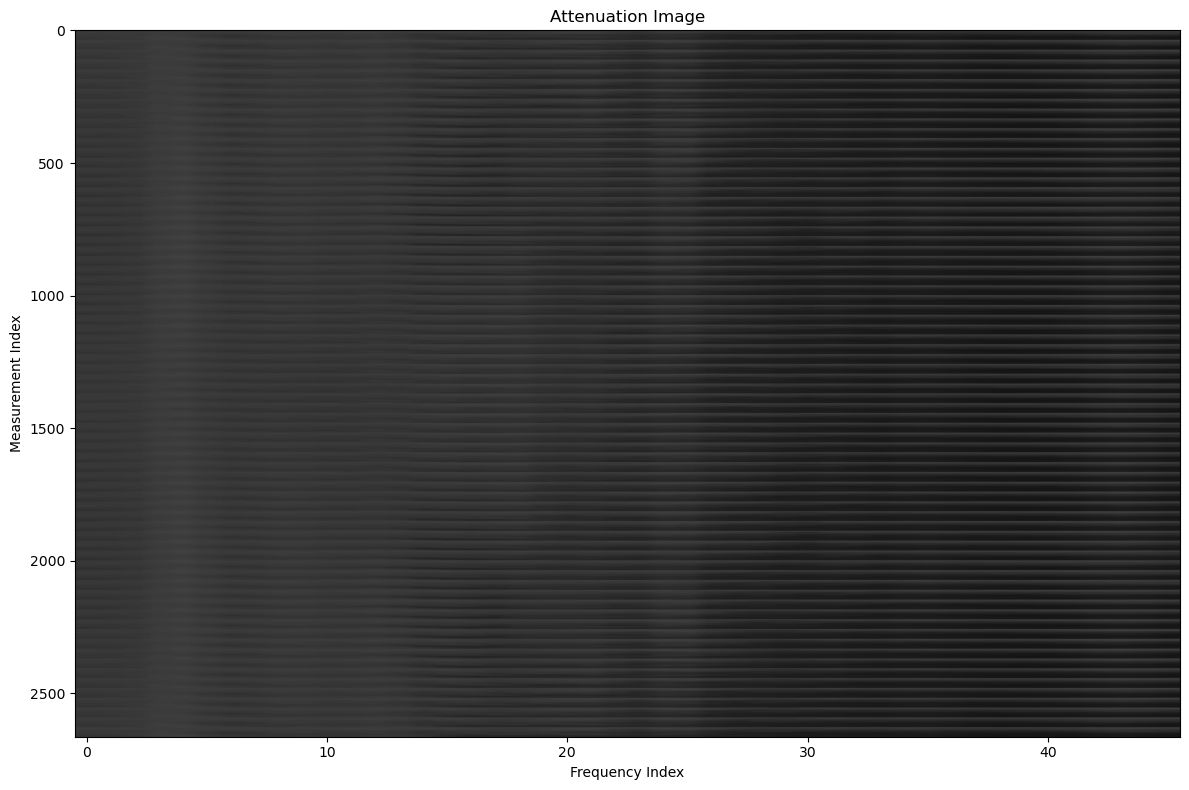

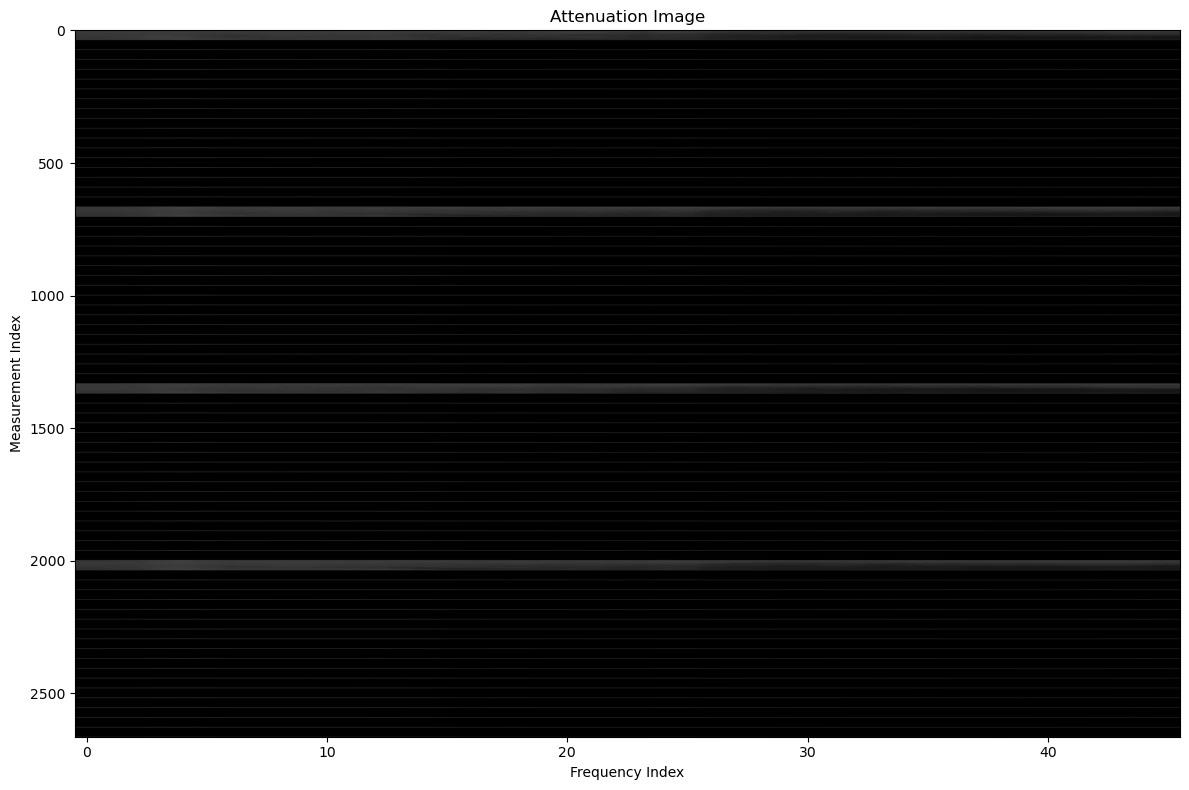

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Artec 320\/IR 0 5000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3

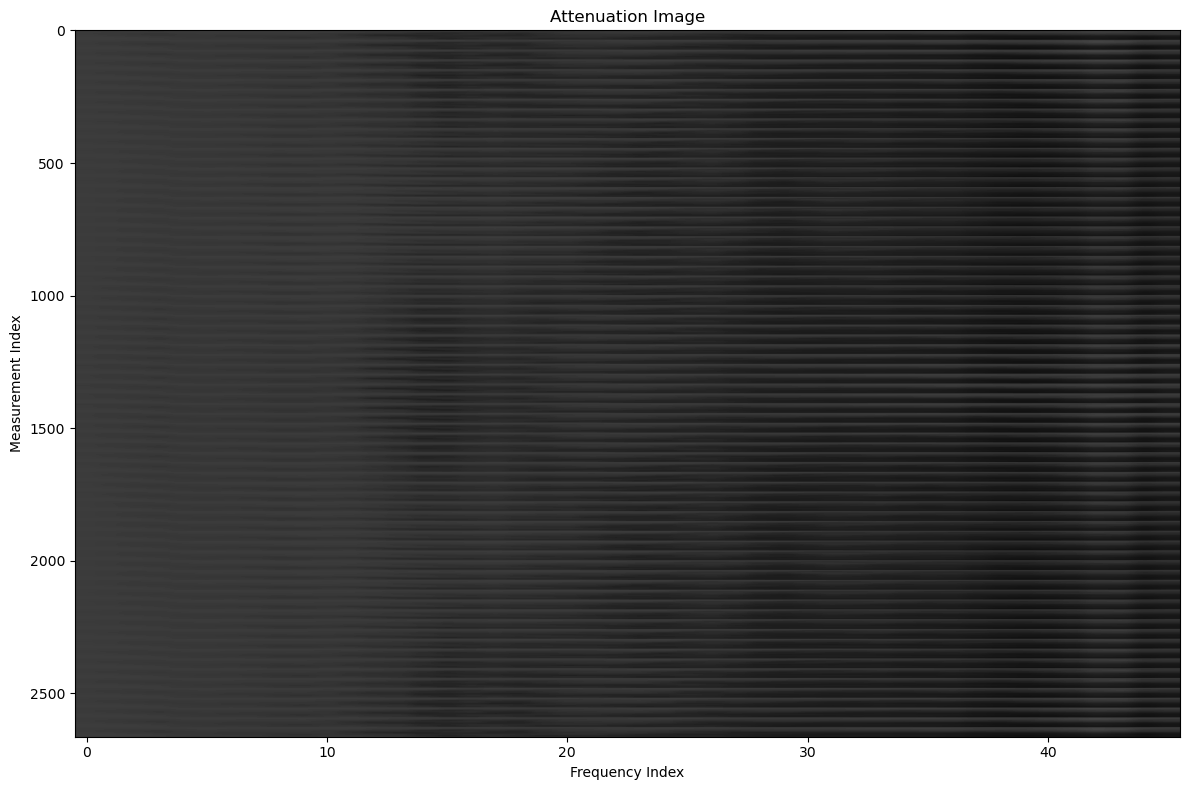

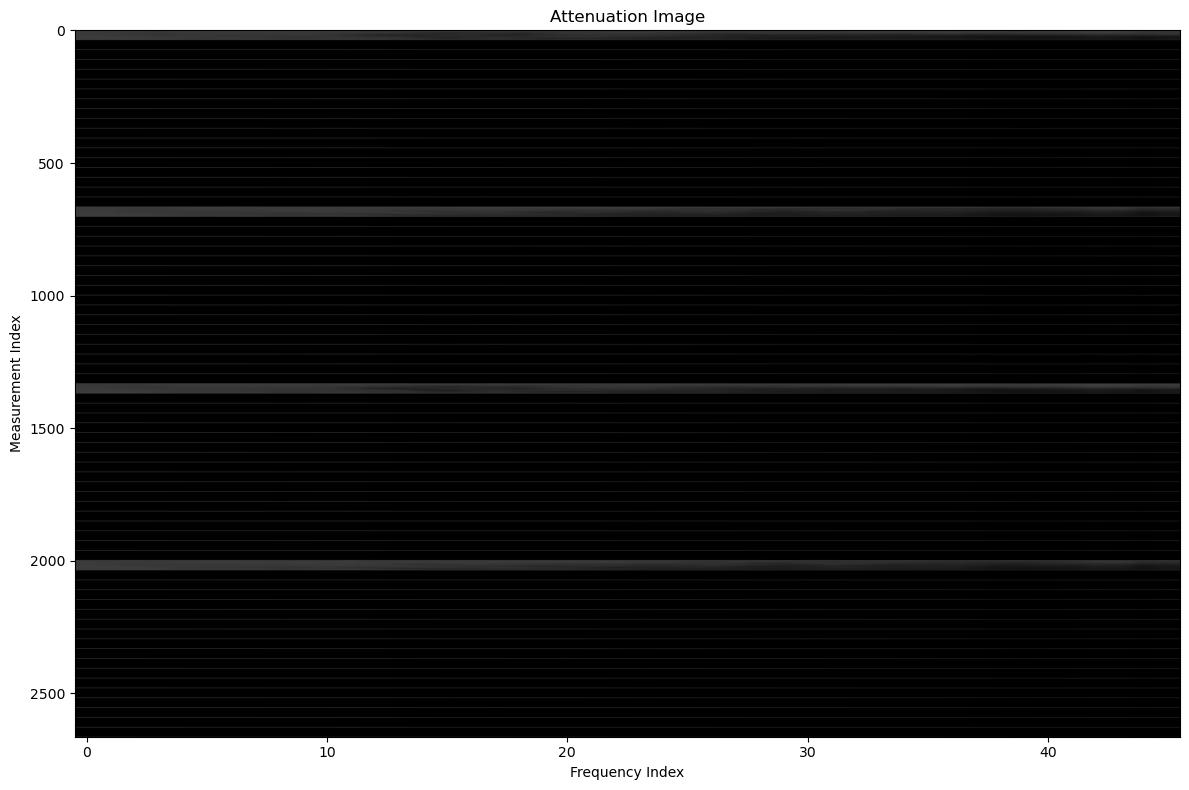

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11264 passive\/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Art

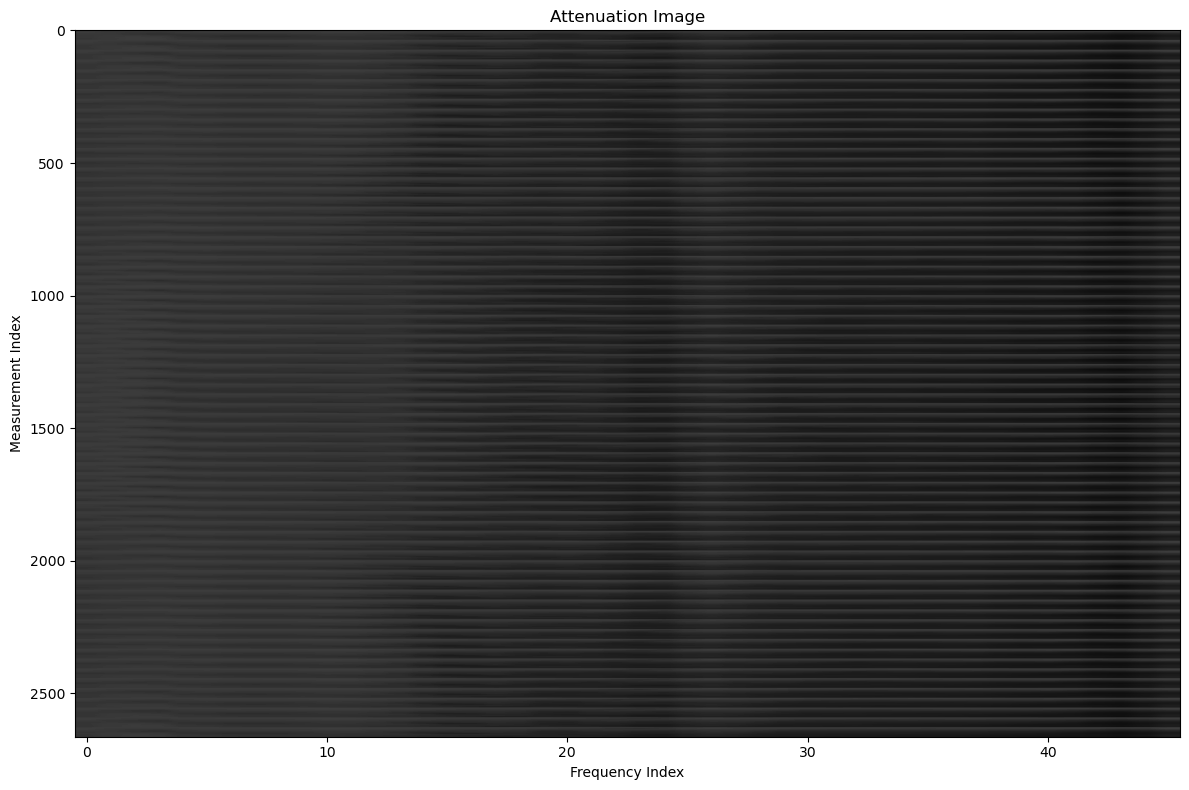

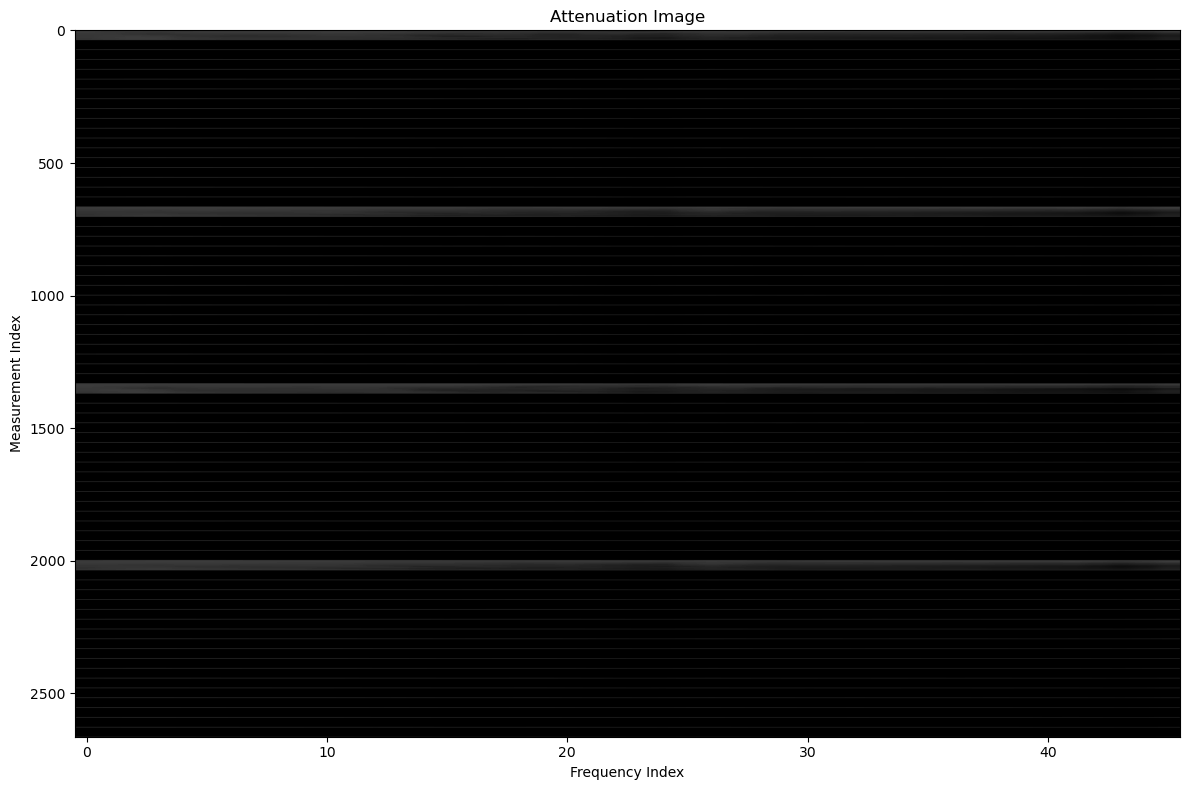

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-11295 passive\/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Art

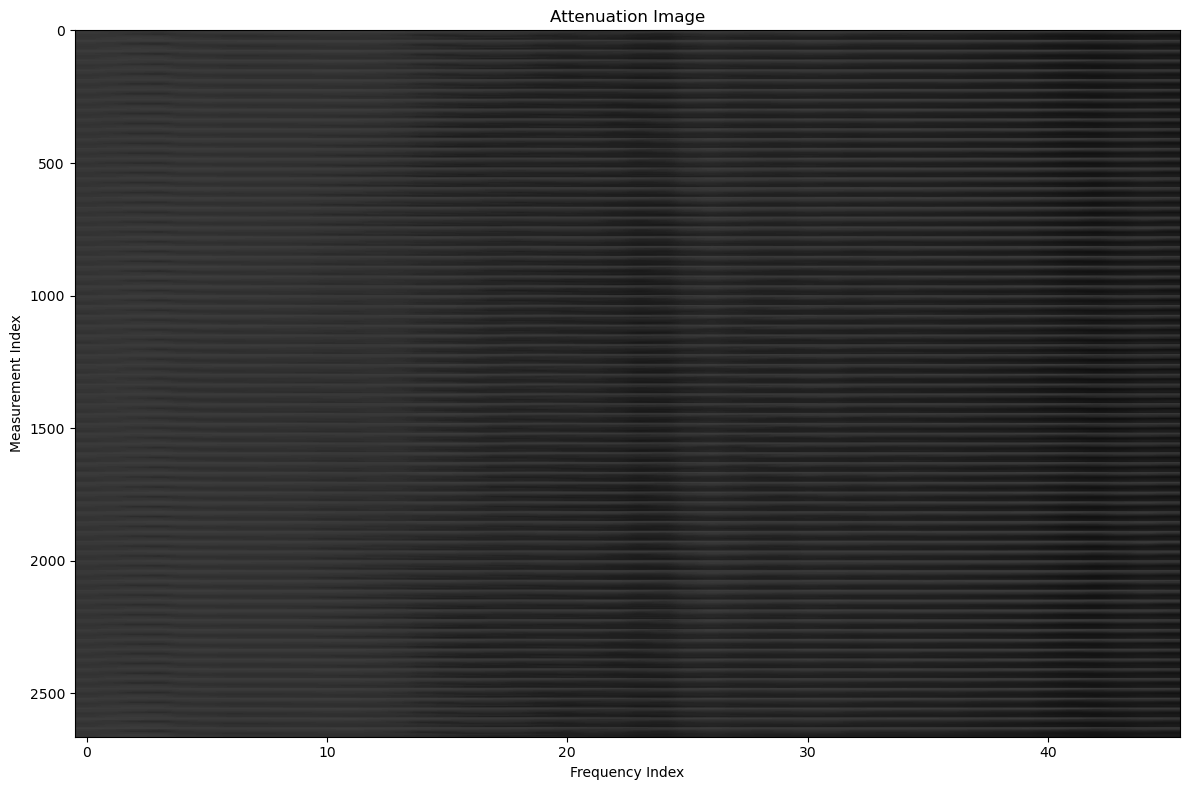

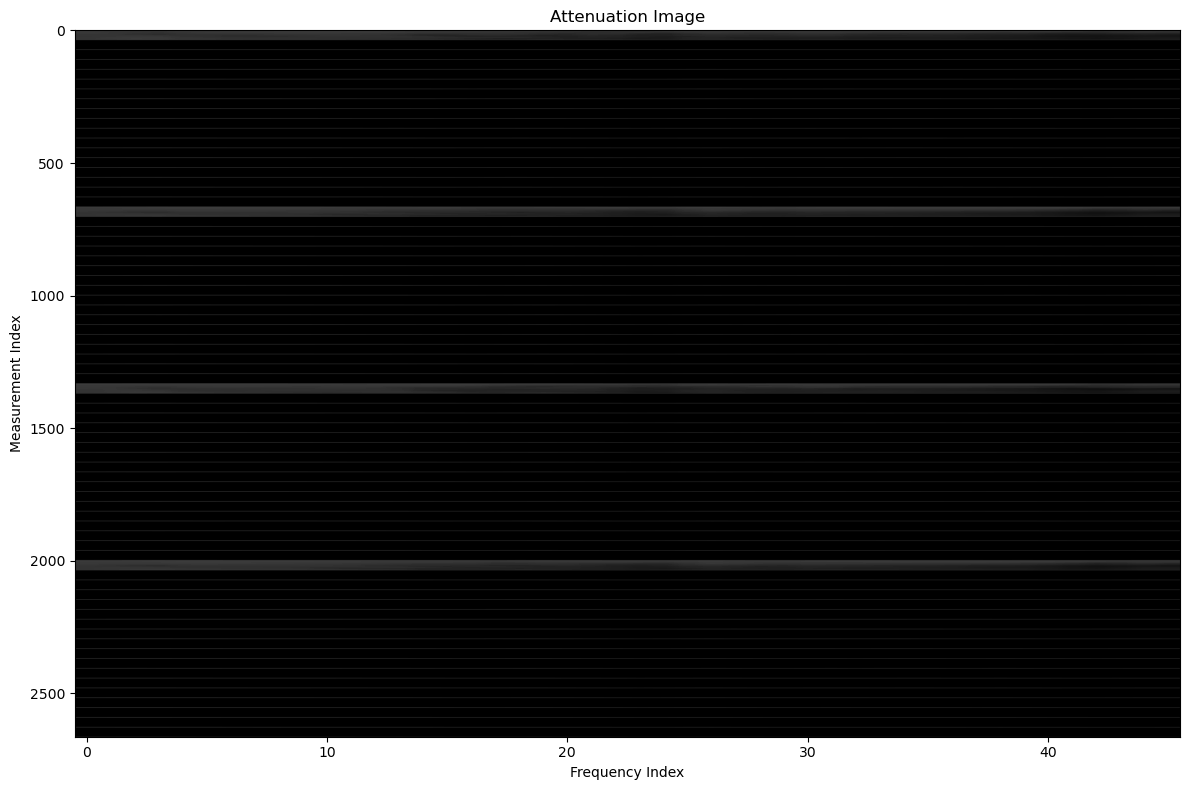

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\HQ-21295 passive\/IR 0 4500.txt
C:\Users\vcatala\OneDrive\PhD UV\Art

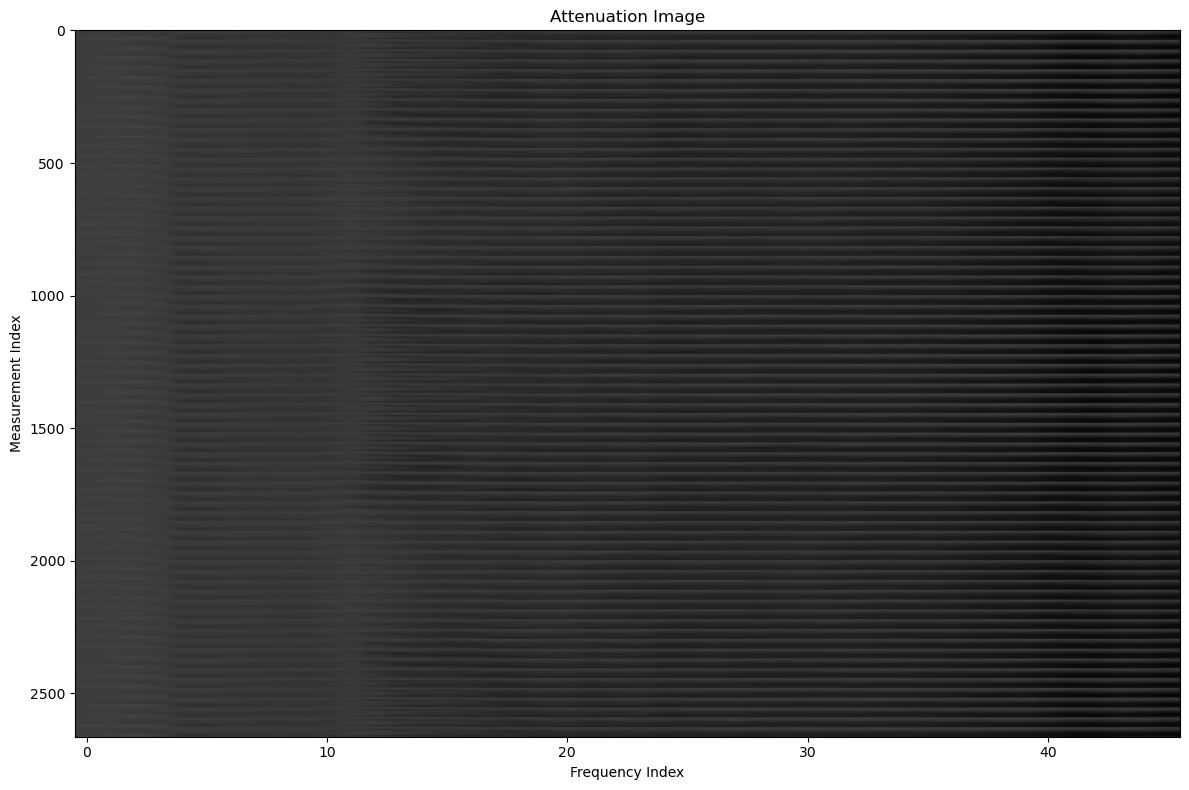

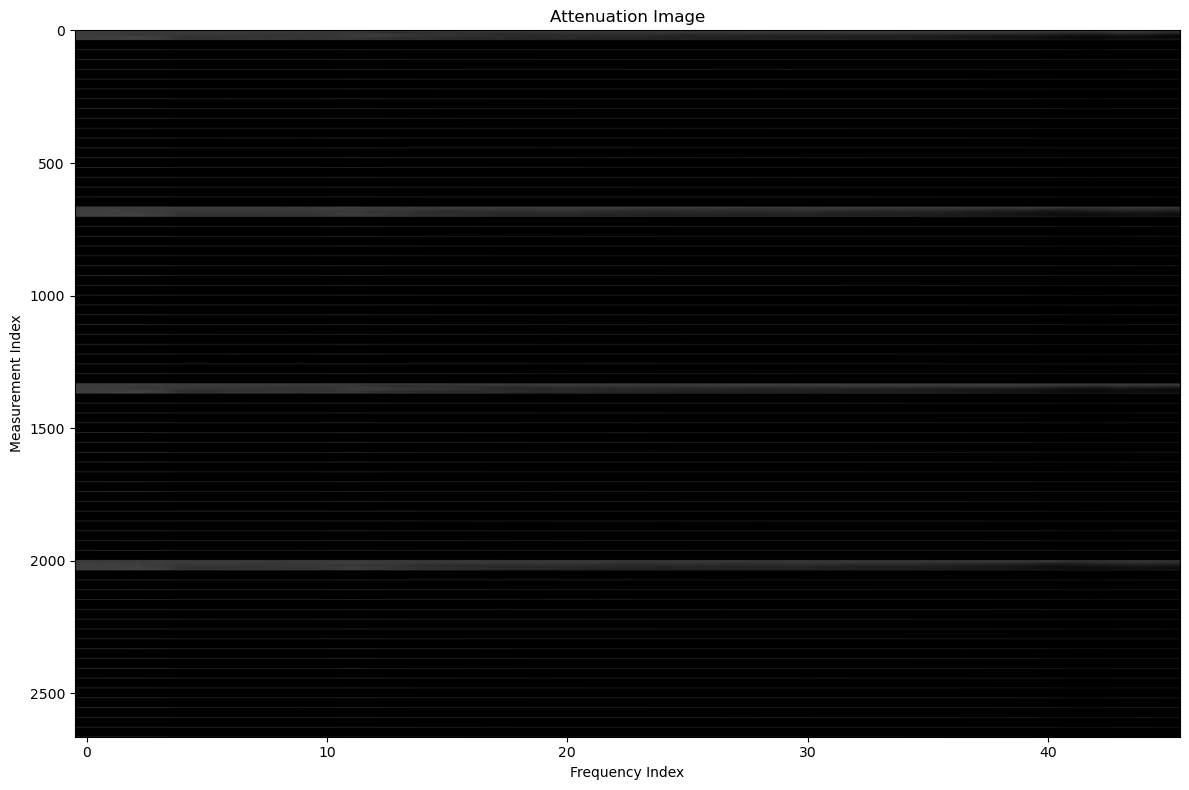

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\


In [42]:
# primero buscamos la ubicación de la carpeta de Onedrive que incluye la carpeta 3D Clio

import os
import glob
import copy
from PIL import Image


# metemos el path a la carpeta donde tenemos todos los datos de los altavoces
rootdir = 'C:\\Users\\vcatala\\OneDrive\\PhD UV\\Artículos\\3D clio\\'




rootdir = 'C:\\Users\\vcatala\\OneDrive\\PhD UV\\Artículos\\3D clio\\'
num_loudspeaker=0
for filepath in glob.glob(f'{rootdir}/*/'):

    print(filepath)
        # trying if there are impulse responses in the folder
    filename= (filepath + '/IR 0 0.txt') # creates the filename for the first measurement 
    try:
        pd.read_csv(filename, delimiter= '\s+')
    except:
        break
    else:
        print(filepath)
        num_loudspeaker+=1
        [IR_i,Fs]=(import_3D(filepath, resol)) # imports impulse responses of current balloon
        FR=FR_pd_v2(IR_i, fft_size, fs) # creates FR dataset
        FR=normalize(FR) # normalizes to on-axis
        FR=seleccionar_columnas_frecuencias_iso(FR, 6, 100, 20000)
        image=create_spl_image(FR)
        file_name_2='' 
        #save_image(image, file_name_2, filepath)
        output_path = filepath + str(num_loudspeaker) + file_name_2  + '.png'
        image.save(output_path)

        FR=data_frame_solo_polares(FR)
        image=create_spl_image(FR)
        file_name_2='_op'
        output_path = filepath + str(num_loudspeaker) + file_name_2  + '.png'
        image.save(output_path)

        
        

C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 0.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 1000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 1500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 2000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 2500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 3000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 3500.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 4000.txt
C:\Users\vcatala\OneDrive\PhD UV\Artículos\3D clio\Test set\EVENT 208A\/IR 0 4500.txt


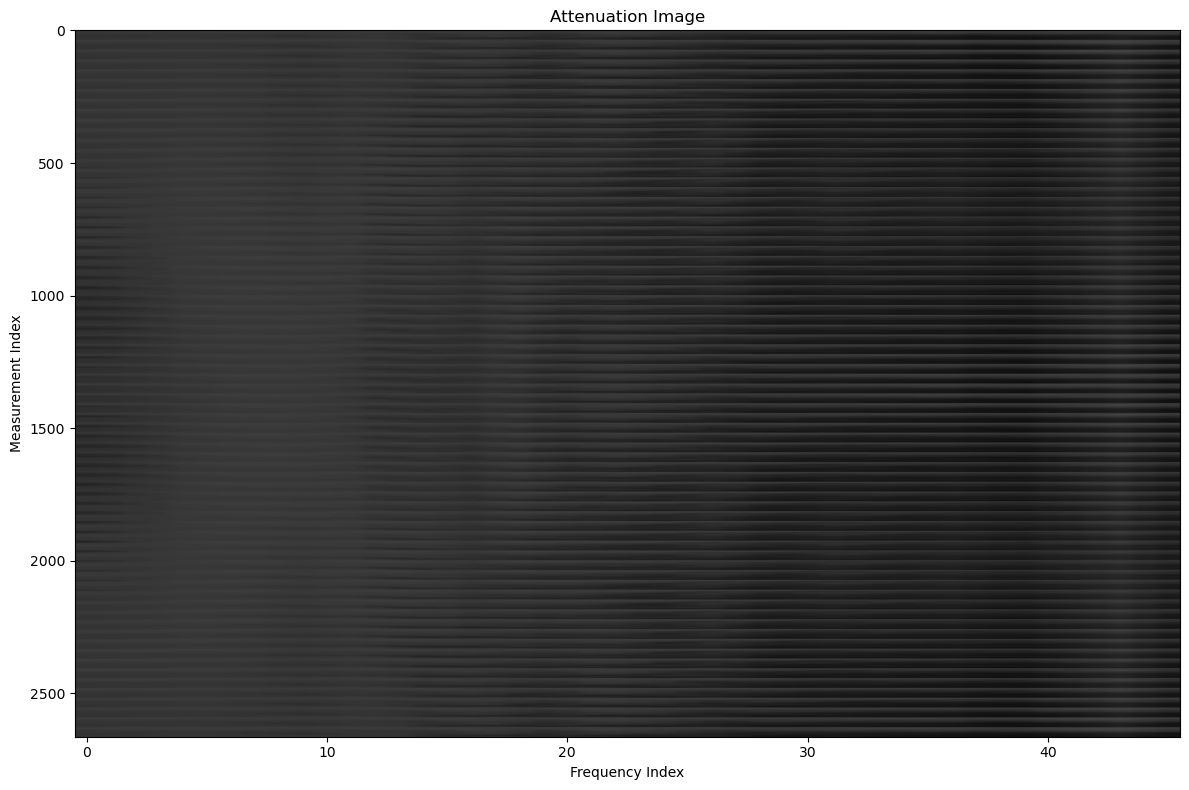

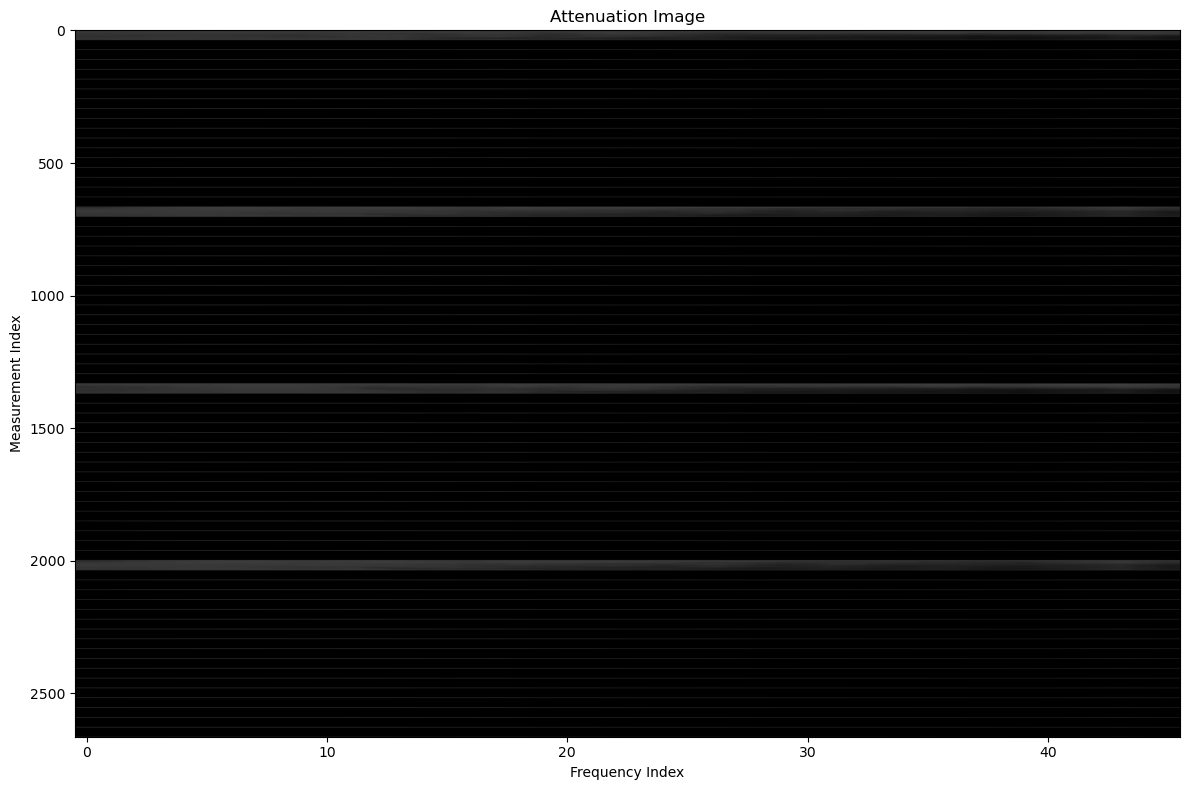

In [43]:


import os
import glob
import copy
from PIL import Image


# metemos el path a la carpeta donde tenemos todos los datos de los altavoces
rootdir = 'C:\\Users\\vcatala\\OneDrive\\PhD UV\\Artículos\\3D clio\\Test set\\'


num_loudspeaker=0
for filepath in glob.glob(f'{rootdir}/*/'):

    print(filepath)
        # trying if there are impulse responses in the folder
    filename= (filepath + '/IR 0 0.txt') # creates the filename for the first measurement 
    try:
        pd.read_csv(filename, delimiter= '\s+')
    except:
        break
    else:
        print(filepath)
        num_loudspeaker+=1
        [IR_i,Fs]=(import_3D(filepath, resol)) # imports impulse responses of current balloon
        FR=FR_pd_v2(IR_i, fft_size, fs) # creates FR dataset
        FR=normalize(FR) # normalizes to on-axis
        FR=seleccionar_columnas_frecuencias_iso(FR, 6, 100, 20000)
        image=create_spl_image(FR)
        file_name_2='' 
        #save_image(image, file_name_2, filepath)
        output_path = filepath + str(num_loudspeaker) + file_name_2  + '.png'
        image.save(output_path)

        FR=data_frame_solo_polares(FR)
        image=create_spl_image(FR)
        file_name_2='_op'
        output_path = filepath + str(num_loudspeaker) + file_name_2  + '.png'
        image.save(output_path)
